In [48]:
!pip install -q -U datasets
!pip install -q -U IPython
!pip install -q -U librosa
!pip install -q -U matplotlib
!pip install -q -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 26.4 MB/s eta 0:00:00


Load the dataset in streaming mode and english language.

In [5]:
from datasets import load_dataset
from json2table import convert
import json

dataset = load_dataset("facebook/voxpopuli", 'en', streaming=True)

In [6]:
dataset

IterableDatasetDict({
    train: IterableDataset({
        features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
        n_shards: 1
    })
    validation: IterableDataset({
        features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
        n_shards: 1
    })
    test: IterableDataset({
        features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
        n_shards: 1
    })
})

In [42]:
num_datapoints = 20
def process_fn(x):
  return x

ds = dataset['train'].take(num_datapoints)

for i in ds:
  print (i['audio_id'], i['normalized_text'])

print ('\n The last sample in the iterator is detailed below')
i

20180418-0900-PLENARY-3-en_20180418-08:50:36_17 if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.
20170614-0900-PLENARY-5-en_20170614-10:03:08_5 they attacked and removed the voices of resistance from our radio and tv stations. they attack and abuse the president who was elected in the united states of america yet celebrate the globalist placeman they installed in france.
20180314-0900-PLENARY-13-en_20180314-16:03:18_3 in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration
20160413-0900-PLENARY-17-en_20160413-15:33:39_4 these are not easy issues to resolve.
20170215-0900-PLENARY-4-en_20170215-10:17:28_5 so it is a good deal.
20150225-0900-PLENARY-9-en_20150225-19:46:16_8 the eu has not so much kicked the can

{'audio_id': '20180912-0900-PLENARY-en_20180912-22:37:06_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180912-0900-PLENARY-en_20180912-22:37:06_3.wav',
  'array': array([-1.22070312e-04, -3.05175781e-05,  3.05175781e-04, ...,
          9.15527344e-05, -9.15527344e-05, -2.13623047e-04]),
  'sampling_rate': 16000},
 'raw_text': "First, on the impact on jobs in order to support workers in the transport industry in adjusting to digitalisation and the transition to low emission mobility, the Commission, in partnership with Member States and stakeholders such as employers, workers' representatives and education and training providers, is addressing skill gaps and mismatches.",
 'normalized_text': "first on the impact on jobs in order to support workers in the transport industry in adjusting to digitalisation and the transition to low emission mobility the commission in partnership with member states and stakeholders such as employers workers' representatives and education and traini

In [40]:
from IPython.display import Audio
Audio(i['audio']['array'],rate=i['audio']['sampling_rate'])

Wave form of the audio sample

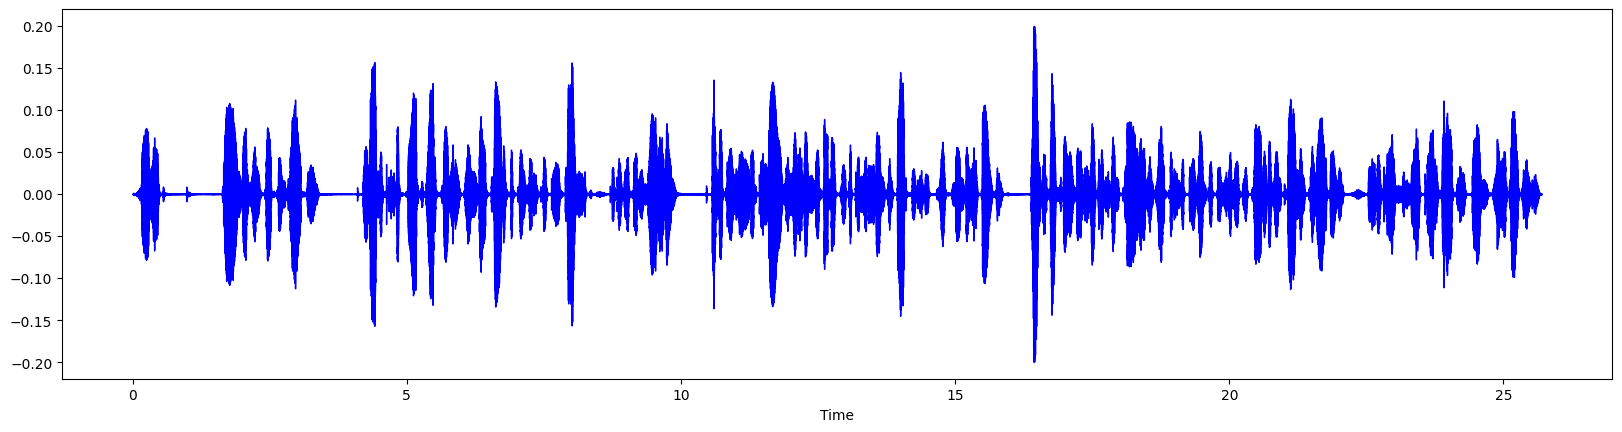

In [46]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

plt.figure().set_figwidth(20)
librosa.display.waveshow(i['audio']['array'], sr=i['audio']['sampling_rate'], color="blue")

**Mel Spectrogram**

A visual presentation of the audio sample as a function of time vs hz.

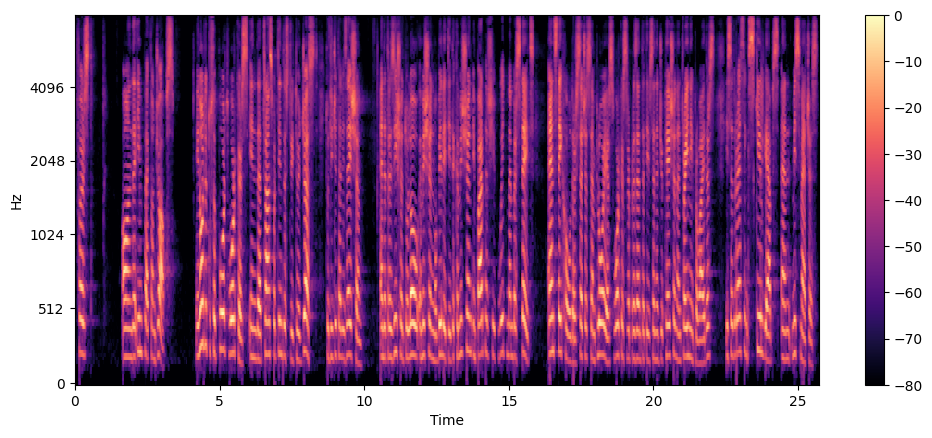

In [47]:
S = librosa.feature.melspectrogram(y=i['audio']['array'], sr=i['audio']['sampling_rate'], n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=i['audio']['sampling_rate'], fmax=8000)
plt.colorbar()

In [50]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")
asr(i["audio"]["array"])

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

{'text': 'FIRST ON THE IMPACT ON JOBS IN ORDER TO SUPPORT WORKERS IN THE TRANSPORT INDUSTRY TO ADJUST TO DIGITALIZATION AND A TRASITION TO LOW EMISSION MOBILITY THE COMMISSION IN PARTNERSHIP WITH MEMBER STATES AND STAYEHOLDER SUCH AS EMPLOYERS WORKERS REPRESENTATIVES AND EDUCATION AND TRAINING PROVIDERS IS ADDRESSING SKILL GABS AND MISSMATCHES'}